# Analysis of Spotify and Billboard Top Songs from 1950-now

Goals

- Uncover if there is a winning chord progression, song structure, genre, length, etc. characteristics for top songs within the current decade.
- Predict a song if it has a chance to be in the top song chart.

In [ ]:
# Load and import packages

#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 35.7 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 25.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [6]:
# Load dataset

df = pd.read_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/top_10000_1950-now.csv')

# DATA WRANGLING

In [ ]:
# Ensure features are not truncated during preview
pd.set_option('display.max_columns', None)

# Preview of dataset

df.tail(5)

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
9995,spotify:track:0gTFo2Va6oImBxUZOEOg9T,Da Ya Think I'm Sexy?,"spotify:artist:45InkbGypoMk5nVX6dsHkt, spotify...","N-Trance, Rod Stewart",spotify:album:1pXHEk0IX0foNN22eCe1h6,Da Ya Think I'm Sexy?,spotify:artist:45InkbGypoMk5nVX6dsHkt,N-Trance,1997-10-27,https://i.scdn.co/image/ab67616d0000b2738995c8...,1,1,262960,https://p.scdn.co/mp3-preview/3326ca012f0f396c...,False,0,GBCFZ9700681,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"eurodance,hip house,mellow gold,soft rock",0.819,0.650,0.0,-10.829,1.0,0.0395,0.000814,0.01270,0.4700,0.794,112.307,4.0,NaN,All Around The World,"C © 1997 Universal Music Operations Limited, P..."
9996,spotify:track:1GLM0M9DA62xZsyp2UNq7i,Sugar,"spotify:artist:0UZ1nu3kcdNlCoiKRjmSSY, spotify...","Peking Duk, Jack River",spotify:album:3ckS9PjG1wgGbMuLKAUkk6,Sugar,"spotify:artist:0UZ1nu3kcdNlCoiKRjmSSY, spotify...","Peking Duk, Jack River",2019-01-17,https://i.scdn.co/image/ab67616d0000b273724dd8...,1,1,191574,https://p.scdn.co/mp3-preview/a7dda55618741c3f...,False,41,AUBM01800432,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"aussietronica,australian electropop,australian...",0.529,0.722,8.0,-5.931,1.0,0.0418,0.004150,0.00155,0.2070,0.470,97.006,4.0,NaN,Sony Music Entertainment,P (P) 2019 Sony Music Entertainment Australia ...
9997,spotify:track:1AMEicdMJudkwm5IgNTx9R,Jackson’s Last Stand - Radio Edit,spotify:artist:1m3jswEIBazYObuVL9NriQ,Ou Est Le Swimming Pool,spotify:album:06qedlQcZitUj1ZqhZqqRh,Jackson’s Last Stand,spotify:artist:1m3jswEIBazYObuVL9NriQ,Ou Est Le Swimming Pool,2010-01-01,https://i.scdn.co/image/ab67616d0000b273ceb2ba...,1,1,190000,https://p.scdn.co/mp3-preview/af21d8011400d856...,False,20,GB7QY1000141,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"australian dance,neo-synthpop",0.602,0.896,10.0,-7.702,0.0,0.0406,0.017400,0.23100,0.3440,0.457,120.016,4.0,NaN,Universal Music Australia Pty. Ltd.,"C © 2010 Fire & Manoeuvre, under exclusive lic..."
9998,spotify:track:5ubGyprsZq8GQriurAF1dW,Sick N Tired,spotify:artist:4Zwtv7Mc3eHv465GJ6au6n,Billy Thorpe & The Aztecs,spotify:album:3cJuy4g8vnye5101NGQtmC,The Very Best Of,spotify:artist:4Zwtv7Mc3eHv465GJ6au6n,Billy Thorpe & The Aztecs,2007-02-06,https://i.scdn.co/image/ab67616d0000b273423d8f...,1,6,188026,https://p.scdn.co/mp3-preview/4f37727f303c4ca9...,False,17,AUAP06400005,spotify:user:bradnumber1,2021-08-08T09:26:31Z,australian rock,0.580,0.504,2.0,-12.164,1.0,0.0810,0.297000,0.00000,0.0871,0.865,166.826,4.0,NaN,WM Australia,"C © 1994 Mushroom Records, P ℗ 1994 Mushroom R..."
9999,spotify:track:197s0DnYmVVQkkpBP6Vjb2,They Won't Let My Girlfriend Talk to Me,spotify:artist:4hLWZnPflr5BbxpHbZYBCk,Jimmy & the Boys,spotify:album:51isv9xcpNlXUEQcXbIdl6,Teddy Boys Picnic,spotify:artist:4hLWZnPflr5BbxpHbZYBCk,Jimmy & the Boys,1981,https://i.scdn.co/image/ab67616d0000b273e7e395...,1,5,198546,https://p.scdn.co/mp3-preview/5a8a3ac33a44619f...,False,0,AULB41700078,spotify:user:bradnumber1,2021-08-08T09:26:31Z,NaN,0.604,0.596,11.0,-10.021,1.0,0.0315,0.528000,0.00000,0.0582,0.337,127.552,3.0,NaN,Fable Records,"C 1981 Avenue Records, P 2017 Southern Cross M..."


In [ ]:
# Size of dataset

df.shape

(10000, 35)

In [ ]:
# check column names

df.columns.to_list()

['Track URI',
 'Track Name',
 'Artist URI(s)',
 'Artist Name(s)',
 'Album URI',
 'Album Name',
 'Album Artist URI(s)',
 'Album Artist Name(s)',
 'Album Release Date',
 'Album Image URL',
 'Disc Number',
 'Track Number',
 'Track Duration (ms)',
 'Track Preview URL',
 'Explicit',
 'Popularity',
 'ISRC',
 'Added By',
 'Added At',
 'Artist Genres',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Time Signature',
 'Album Genres',
 'Label',
 'Copyrights']

In [ ]:
# Select columns to keep for analysis

cols_to_keep = [
 'Track Name',
 'Artist Name(s)',
 'Album Name',
 'Album Artist Name(s)',
 'Album Release Date',
 'Disc Number',
 'Track Number',
 'Track Duration (ms)',
 'Explicit',
 'Popularity',
 'Artist Genres',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Time Signature',
 'Label']

# Create a df subset

df_sub = df[cols_to_keep]

In [ ]:
df_sub.head(10)

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,Fader,The Temper Trap,Conditions (Tour Edition),The Temper Trap,2009,1,6,192373,False,0,"indietronica,modern rock,shimmer pop",0.532,0.760,11.0,-7.123,0.0,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,Liberation Records
1,Sherry,Frankie Valli & The Four Seasons,The Very Best of Frankie Valli & The 4 Seasons,Frankie Valli & The Four Seasons,2003-01-14,1,1,152160,False,54,"adult standards,bubblegum pop,doo-wop,lounge,n...",0.703,0.478,7.0,-8.062,1.0,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,Rhino
2,I Took A Pill In Ibiza - Seeb Remix,"Mike Posner, Seeb","At Night, Alone.",Mike Posner,2016-05-06,1,13,197933,True,63,"dance pop,pop,pop dance,pop rap,pop dance",0.664,0.714,7.0,-6.645,0.0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,"Monster Mountain, LLC / Island"
3,Let Go for Tonight,Foxes,Glorious (Deluxe),Foxes,2014-05-12,1,5,238413,False,39,"electropop,metropopolis,uk pop",0.543,0.808,9.0,-6.615,0.0,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,Sign Of The Times Records
4,The Way I Want To Touch You,Captain & Tennille,Love Will Keep Us Together,Captain & Tennille,1975-01-01,1,3,163586,False,35,"mellow gold,soft rock,yacht rock",0.664,0.585,0.0,-7.062,0.0,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,A&M
5,Still Got Time (feat. PARTYNEXTDOOR),"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),ZAYN,2017-03-23,1,1,188490,False,53,"pop,uk pop,r&b,rap,urban contemporary",0.748,0.627,7.0,-6.029,1.0,0.0639,0.131000,0.000000,0.0852,0.524,120.963,4.0,RCA Records Label
6,Your Song,Rita Ora,Phoenix (Deluxe Edition),Rita Ora,2018-11-23,1,5,180160,False,60,"dance pop,pop,uk pop",0.853,0.571,1.0,-5.845,1.0,0.0543,0.133000,0.000000,0.0564,0.958,117.991,4.0,Atlantic Records UK
7,Fix You,Coldplay,X&Y,Coldplay,2005-06-07,1,4,295533,False,83,"permanent wave,pop",0.209,0.417,3.0,-8.740,1.0,0.0338,0.164000,0.001960,0.1130,0.124,138.178,4.0,Parlophone Records Limited
8,There You'll Be - 2007 Remaster,Faith Hill,The Hits,Faith Hill,2007,1,7,220840,False,44,"contemporary country,country,country dawn,coun...",0.325,0.532,8.0,-7.208,1.0,0.0308,0.496000,0.000000,0.1340,0.162,129.021,4.0,Warner Records/Nashville
9,Every Breath You Take - Remastered 2003,The Police,Synchronicity,The Police,1983-06-01,1,7,253886,False,3,"album rock,classic rock,permanent wave,rock",0.813,0.460,1.0,-9.780,1.0,0.0346,0.560000,0.010500,0.0724,0.729,117.387,4.0,A&M


In [ ]:
# Rename columns for ease of coding

df_sub.rename(columns={
    'Track Name':'track-name',
    'Artist Name(s)': 'artist',
    'Album Name': 'album-name',
    'Album Artist Name(s)': 'album-artist-name',
    'Album Release Date': 'album-release-date',
    'Disc Number': 'disc-number',
    'Track Number': 'track-number',
    'Track Duration (ms)': 'track-duration',
    'Explicit': 'explicit',
    'Popularity': 'popularity',
    'Artist Genres': 'artist-genres',
    'Danceability': 'danceability',
    'Energy': 'energy',
    'Key': 'key',
    'Loudness': 'loudness',
    'Mode': 'mode',
    'Speechiness': 'speechiness',
    'Acousticness': 'acousticness',
    'Instrumentalness': 'instrumentalness',
    'Liveness': 'liveness',
    'Valence': 'valence',
    'Tempo': 'tempo',
    'Time Signature': 'time-signature',
    'Label': 'label'}, inplace=True
)

/var/folders/89/g5nm5qz95_s9gxzz70nt4lb40000gn/T/ipykernel_51522/1794534378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.rename(columns={


In [ ]:
# count missing values

missing_values = df_sub.isna().sum()
missing_values

track-name              2
artist                  2
album-name              2
album-artist-name       2
album-release-date      2
disc-number             0
track-number            0
track-duration          0
explicit                0
popularity              0
artist-genres         551
danceability            5
energy                  5
key                     5
loudness                5
mode                    5
speechiness             5
acousticness            5
instrumentalness        5
liveness                5
valence                 5
tempo                   5
time-signature          5
label                   7
dtype: int64

In [ ]:
# Visualize all the rows with any missing data

missing_rows = df_sub[df_sub.isnull().any(axis=1)]
missing_rows

,track-name,artist,album-name,album-artist-name,album-release-date,disc-number,track-number,track-duration,explicit,popularity,artist-genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time-signature,label
29,Montego Bay,Bobby Bloom,The Bobby Bloom Album,Bobby Bloom,1970-01-01,1,11,176466,False,39,NaN,0.765,0.586,7.0,-10.332,1.0,0.0367,0.7340,0.002180,0.1130,0.943,105.567,4.0,Universal Records
42,I Am the Beat,The Look,The Look,The Look,1981,1,7,180547,False,25,NaN,0.429,0.657,8.0,-9.708,1.0,0.0788,0.2620,0.000061,0.0506,0.784,174.984,4.0,Rdeg
44,Twistin' Matilda (And the Channel),Jimmy Soul,I You Wanna Be Happy,Jimmy Soul,2013-12-02,1,3,174933,False,0,NaN,0.535,0.775,7.0,-7.606,1.0,0.1550,0.7150,0.000000,0.2280,0.847,141.424,4.0,Black Sheep Music
93,Michelle,The Overlanders,Original Hits: 1966,Various Artists,2015-05-04,1,11,141663,False,0,NaN,0.528,0.507,6.0,-7.558,0.0,0.0269,0.7710,0.000000,0.1910,0.486,61.007,4.0,Sanctuary Records
101,Forever Young,Youth Group,Casino Twilight Dogs,Youth Group,2007-01-30,1,8,239120,False,52,NaN,0.379,0.664,11.0,-6.863,1.0,0.0307,0.0167,0.000679,0.0915,0.301,115.272,4.0,Anti/Epitaph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,Even When I'm Sleeping,Leonardo's Bride,Angel Blood,Leonardo's Bride,1996,1,1,234666,False,40,NaN,0.653,0.345,5.0,-7.137,1.0,0.0246,0.5330,0.000000,0.0881,0.416,80.037,4.0,WM Australia
9964,Everybody's Free (To Wear Sunscreen),"Quindon Tarver, Josh Abrahams",Everybody's Free (To Wear Sunscreen),Baz Luhrmann,1999-01-01,1,1,309133,False,14,NaN,0.827,0.526,6.0,-13.365,0.0,0.3630,0.6390,0.000008,0.3910,0.801,91.552,4.0,Capitol Records
9992,Torn Between Two Lovers,Mary MacGregor,Essential Memories Of Love,Various Artists,2010-02-09,2,6,230426,False,45,NaN,0.552,0.343,10.0,-12.502,1.0,0.0309,0.7300,0.000099,0.4680,0.480,132.415,4.0,RCA Records Label
9994,Puttin' on the Ritz,Taco,After Eight,Taco,1982-01-01,1,3,281160,False,60,NaN,0.798,0.292,0.0,-17.112,1.0,0.0777,0.1520,0.001010,0.1850,0.812,98.653,4.0,Aviator-Entertainment


In [ ]:
missing_rows.columns.to_list()

['track-name',
 'artist',
 'album-name',
 'album-artist-name',
 'album-release-date',
 'disc-number',
 'track-number',
 'track-duration',
 'explicit',
 'popularity',
 'artist-genres',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time-signature',
 'label']

In [ ]:
# Check and manually fill missing rows with < 10 missing values -- df is only for preview

missing_rows_less10 = missing_rows[[
 'track-name',
 'artist',
 'album-name',
 'album-artist-name',
 'album-release-date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time-signature',
 'label']]

missing_rows_less10 = missing_rows_less10[missing_rows_less10.isnull().any(axis=1)]
missing_rows_less10


,track-name,artist,album-name,album-artist-name,album-release-date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time-signature,label
387,NaN,NaN,NaN,Various Artists,0000,0.670,0.787,7.0,-4.277,0.0,0.0519,0.02280,0.000002,0.125,0.713,139.906,4.0,NaN
2079,You've Got To Hide Your Love Away,The Beatles,1962-1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,I Write Sins Not Tragedies,Panic! At The Disco,A Fever You Can't Sweat Out,Panic! At The Disco,2005-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fueled By Ramen/ADA
2927,Your Song,Elton John,Voices From The FIFA World Cup,Various Artists,2006-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Syco Music UK
3882,Move Your Body,Eiffel 65,Europop,Eiffel 65,1999,0.745,0.958,7.0,-9.664,1.0,0.0287,0.08140,0.320000,0.533,0.960,129.962,4.0,NaN
4432,Seven Nation Army,The White Stripes,Elephant,The White Stripes,2003-04-01,0.750,0.462,0.0,-7.664,1.0,0.0779,0.00576,0.545000,0.307,0.309,123.865,4.0,NaN
6778,NaN,NaN,NaN,Various Artists,0000,0.858,0.884,5.0,-4.435,1.0,0.0387,0.05880,0.000000,0.121,0.963,104.019,4.0,NaN
6980,Come to Me (feat. Nicole Scherzinger),"Diddy, Nicole Scherzinger",Press Play,Diddy,2006-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Boy Records
7122,Blue (Da Ba Dee),Eiffel 65,Europop,Eiffel 65,1999,0.822,0.969,7.0,-11.471,0.0,0.0582,0.25900,0.000162,0.390,0.765,128.007,4.0,NaN
7565,Too Young For Promises,Koo De Tah,Too Young For Promises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop rows with no track name and artist name since we have no way of knowing what the song is
df_sub = df_sub.drop([387, 6778])

# Manually update specific rows in the df_sub
df_sub.loc[2079, ['album-artist-name', 'album-release-date', 'time-signature', 'tempo', 'label']] = [
    'The Beatles', '1973', 3, 180, 'Parlophone'
]

df_sub.loc[2179, ['time-signature', 'tempo']] = [4, 170]
df_sub.loc[2927, ['time-signature', 'tempo']] = [4, 128]
df_sub.loc[3882, 'label'] = 'Warner Music Group Eternal'
df_sub.loc[4432, 'label'] = 'XL Recordings'
df_sub.loc[6980, ['time-signature', 'tempo']] = [4, 97]
df_sub.loc[7122, 'label'] = 'Warner Music Group Eternal'

df_sub.loc[7565, ['album-artist-name', 'album-release-date', 'tempo', 'time-signature', 'label']] = [
    'Koo De Tah', '1985', 123, 6, 'Mercury'
]

In [ ]:
# Show artist and artist genres, the strategy is to reuse the genre values of rows with that artist name

missing_rows_genre = missing_rows[['artist', 'artist-genres']]

In [ ]:
missing_rows_genre

,artist,artist-genres
29,Bobby Bloom,NaN
42,The Look,NaN
44,Jimmy Soul,NaN
93,The Overlanders,NaN
101,Youth Group,NaN
...,...,...
9960,Leonardo's Bride,NaN
9964,"Quindon Tarver, Josh Abrahams",NaN
9992,Mary MacGregor,NaN
9994,Taco,NaN


In [ ]:
# First, build a mapping of known genres for each artist
artist_genre_map = df_sub.dropna(subset=['artist-genres']).groupby('artist')['artist-genres'].first()

# Use this mapping to fill missing 'artist-genres' where the artist matches
df_sub['artist-genres'] = df_sub.apply(
    lambda row: artist_genre_map[row['artist']] if pd.isna(row['artist-genres']) and row['artist'] in artist_genre_map else row['artist-genres'],
    axis=1
)

In [ ]:
import requests
import time
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()

# Get the API key
API_KEY = os.getenv("API_KEY")

def get_lastfm_genre(artist_name):
    """Fetch top tags (genres) from Last.fm for a given artist."""
    try:
        url = 'http://ws.audioscrobbler.com/2.0/'
        params = {
            'method': 'artist.gettoptags',
            'artist': artist_name,
            'api_key': API_KEY,
            'format': 'json'
        }
        response = requests.get(url, params=params)
        data = response.json()

        if 'toptags' in data and 'tag' in data['toptags']:
            # Return top 3 tags, comma-separated
            tags = [tag['name'] for tag in data['toptags']['tag'][:3]]
            return ', '.join(tags)
        return None
    except Exception as e:
        print(f"Error fetching genre for {artist_name}: {e}")
        return None

# Filter artists with missing genre
missing_genre_mask = df_sub['artist-genres'].isna()
missing_artists = df_sub.loc[missing_genre_mask, 'artist'].unique()

# Fetch genres using Last.fm, if not in the database just use "N/A"
genre_map = {}
for artist in missing_artists:
    genre = get_lastfm_genre(artist)
    genre_map[artist] = genre if genre else 'N/A'
    print(f"{artist} → {genre_map[artist]}")
    time.sleep(0.3)



# Fill missing genres
df_sub.loc[missing_genre_mask, 'artist-genres'] = df_sub.loc[missing_genre_mask, 'artist'].map(genre_map)

Bobby Bloom → 70s, bubblegum, tragic death
The Look → new wave, pop, 80s
Jimmy Soul → soul, 60s, oldies
The Overlanders → 60s, pop, rock
Youth Group → indie, indie rock, australian
Adrian Lux → House, electronic, swedish
E.Y.C. → pop, american, under 2000 listeners
Chase Martin → indie, country, female vocalists
Penny McLean → Disco, 70s, female vocalists
Monte Video → indie rock, pop rock, new wave
Little Cesar & The Romans → oldies, doo wop, Rock and Roll
Bill Blacks Combo → jazz, instrumental, american
Absolutely Fabulous → british, 90s, Pet Shop Boys
Edison Lighthouse → pop, classic rock, oldies
Maria McKee → female vocalists, country, singer-songwriter
Britney Holmes → soul, female vocalists, rnb
Graham Bonnet → hard rock, seen live, classic rock
Eruption → Disco, 80s, dance
Hans Poulsen → australia, everything
Jack Blanchard & Misty Morgan, Misty Morgen → N/A
Ron Holden → oldies, rnb, Rock and Roll
Sananda Maitreya → soul, pop, funk
Haysi Fantayzee → new wave, 80s, british
Len → 

In [ ]:
df_sub = pd.to_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/filled-top-songs.csv')

In [ ]:
df = df_sub.copy()

In [ ]:
# Revisualize all the rows with any missing data

missing_rows = df[df.isnull().any(axis=1)]
print('Size of missing rows:', missing_rows.shape)
missing_rows

Size of missing rows: (5, 24)


,track-name,artist,album-name,album-artist-name,album-release-date,disc-number,track-number,track-duration,explicit,popularity,artist-genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time-signature,label
2079,You've Got To Hide Your Love Away,The Beatles,1962-1966,The Beatles,1973,0,0,131000,False,0,"british invasion,classic rock,merseybeat,psych...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,3.0,Parlophone
2179,I Write Sins Not Tragedies,Panic! At The Disco,A Fever You Can't Sweat Out,Panic! At The Disco,2005-09-27,1,10,185586,False,68,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,4.0,Fueled By Ramen/ADA
2927,Your Song,Elton John,Voices From The FIFA World Cup,Various Artists,2006-05-29,1,3,242493,False,0,"glam rock,mellow gold,piano rock,rock",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,4.0,Syco Music UK
6980,Come to Me (feat. Nicole Scherzinger),"Diddy, Nicole Scherzinger",Press Play,Diddy,2006-10-16,1,6,276786,True,49,"dance pop,east coast hip hop,hip hop,hip pop,p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,4.0,Bad Boy Records
7565,Too Young For Promises,Koo De Tah,Too Young For Promises,Koo De Tah,1985,0,0,216000,False,0,"synthpop, 80s, pop",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,6.0,Mercury


In [ ]:
# Fill the missing numerical values with mean

df['danceability'] = df['danceability'].fillna(df['danceability'].mean())
df['energy'] = df['energy'].fillna(df['energy'].mean())
df['key'] = df['key'].fillna(df['key'].mean())
df['loudness'] = df['loudness'].fillna(df['loudness'].mean())
df['mode'] = df['mode'].fillna(df['mode'].mean())
df['speechiness'] = df['speechiness'].fillna(df['speechiness'].mean())
df['acousticness'] = df['acousticness'].fillna(df['acousticness'].mean())
df['instrumentalness'] = df['instrumentalness'].fillna(df['instrumentalness'].mean())
df['liveness'] = df['liveness'].fillna(df['liveness'].mean())
df['valence'] = df['valence'].fillna(df['valence'].mean())

In [ ]:
# Final check if there is any missing data

missing_rows = df[df.isnull().any(axis=1)]
print('Size of missing rows:', missing_rows.shape)

Size of missing rows: (0, 24)


In [ ]:
# Save df to csv

df_sub.to_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/top-song-genre-scrape.csv')
df.to_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/clean-top-songs.csv')

# Handling duplicate top songs

In [55]:
df_to_clean = pd.read_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/top-song-genre-scrape.csv')
df_to_clean

,Unnamed: 0,track-name,artist,album-name,album-artist-name,album-release-date,disc-number,track-number,track-duration,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time-signature,label
0,0,Fader,The Temper Trap,Conditions (Tour Edition),The Temper Trap,2009,1,6,192373,False,...,-7.123,0.0,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,Liberation Records
1,1,Sherry,Frankie Valli & The Four Seasons,The Very Best of Frankie Valli & The 4 Seasons,Frankie Valli & The Four Seasons,2003-01-14,1,1,152160,False,...,-8.062,1.0,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,Rhino
2,2,I Took A Pill In Ibiza - Seeb Remix,"Mike Posner, Seeb","At Night, Alone.",Mike Posner,2016-05-06,1,13,197933,True,...,-6.645,0.0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,"Monster Mountain, LLC / Island"
3,3,Let Go for Tonight,Foxes,Glorious (Deluxe),Foxes,2014-05-12,1,5,238413,False,...,-6.615,0.0,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,Sign Of The Times Records
4,4,The Way I Want To Touch You,Captain & Tennille,Love Will Keep Us Together,Captain & Tennille,1975-01-01,1,3,163586,False,...,-7.062,0.0,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,A&M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9995,Da Ya Think I'm Sexy?,"N-Trance, Rod Stewart",Da Ya Think I'm Sexy?,N-Trance,1997-10-27,1,1,262960,False,...,-10.829,1.0,0.0395,0.000814,0.012700,0.4700,0.794,112.307,4.0,All Around The World
9994,9996,Sugar,"Peking Duk, Jack River",Sugar,"Peking Duk, Jack River",2019-01-17,1,1,191574,False,...,-5.931,1.0,0.0418,0.004150,0.001550,0.2070,0.470,97.006,4.0,Sony Music Entertainment
9995,9997,Jackson’s Last Stand - Radio Edit,Ou Est Le Swimming Pool,Jackson’s Last Stand,Ou Est Le Swimming Pool,2010-01-01,1,1,190000,False,...,-7.702,0.0,0.0406,0.017400,0.231000,0.3440,0.457,120.016,4.0,Universal Music Australia Pty. Ltd.
9996,9998,Sick N Tired,Billy Thorpe & The Aztecs,The Very Best Of,Billy Thorpe & The Aztecs,2007-02-06,1,6,188026,False,...,-12.164,1.0,0.0810,0.297000,0.000000,0.0871,0.865,166.826,4.0,WM Australia


In [61]:
# Example duplicate songs of a given artist

df_to_clean_dup = df_to_clean[df_to_clean.duplicated(subset=['track-name', 'artist'], keep=False)].sort_values(by=['artist', 'track-name'])
df_to_clean_dup.head(5)

,Unnamed: 0,track-name,artist,album-name,album-artist-name,album-release-date,disc-number,track-number,track-duration,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time-signature,label
3971,3972,Bye Bye Bye,*NSYNC,No Strings Attached,*NSYNC,2000-03-21,1,1,200560,False,...,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,4.0,Jive
5237,5238,Bye Bye Bye,*NSYNC,Greatest Hits,*NSYNC,2005-10-21,1,1,199640,False,...,-3.877,0.0,0.0644,0.0198,0.000007,0.0564,0.811,172.716,4.0,Jive
4347,4348,Mood (feat. iann dior),"24kGoldn, iann dior",El Dorado,24kGoldn,2021-03-24,1,13,140877,False,...,-3.644,0.0,0.0358,0.1920,0.000000,0.1280,0.760,91.008,4.0,Records/Columbia
7992,7994,Mood (feat. iann dior),"24kGoldn, iann dior",Mood (feat. iann dior),"24kGoldn, iann dior",2020-07-24,1,1,140525,True,...,-3.558,0.0,0.0369,0.2210,0.000000,0.2720,0.756,90.989,4.0,Records/Columbia
4679,4680,Here Without You,3 Doors Down,Away From The Sun,3 Doors Down,2002-11-12,1,6,238733,False,...,-6.817,0.0,0.0252,0.0492,0.000000,0.2050,0.233,143.994,4.0,Universal Records


In [62]:
# Make a duplicate column for track-name, call it track-name-to clean
df_to_clean['track-name-to-clean'] = df_to_clean['track-name']

# Make a duplicate column for artist, call it artist-to clean
df_to_clean['artist-to-clean'] = df_to_clean['artist']

In [64]:
# for track-name-to-clean, Convert all track-name to lowercase, remove trailing space, remove punctuations, and anything else to be able to determine duplicate title

import re

df_to_clean['track-name-to-clean'] = (
    df_to_clean['track-name-to-clean']
    .str.lower()                           # Convert to lowercase
    .str.strip()                           # Remove leading/trailing spaces
    .apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation
    .str.replace(r'\s+', ' ', regex=True)   # Normalize multiple spaces to single space
)

In [65]:
# for artist-name-to-clean, Convert all artist to lowercase, remove trailing space, remove punctuations, and anything else to be able to determine duplicate title

df_to_clean['artist-to-clean'] = (
    df_to_clean['artist-to-clean']
    .str.lower()                           # Convert to lowercase
    .str.strip()                           # Remove leading/trailing spaces
    .apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation
    .str.replace(r'\s+', ' ', regex=True)   # Normalize multiple spaces to single space
)

In [66]:
df_to_clean.head(5)

,Unnamed: 0,track-name,artist,album-name,album-artist-name,album-release-date,disc-number,track-number,track-duration,explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time-signature,label,track-name-to-clean,artist-to-clean
0,0,Fader,The Temper Trap,Conditions (Tour Edition),The Temper Trap,2009,1,6,192373,False,...,0.0353,0.000101,0.690000,0.0752,0.158,134.974,4.0,Liberation Records,fader,the temper trap
1,1,Sherry,Frankie Valli & The Four Seasons,The Very Best of Frankie Valli & The 4 Seasons,Frankie Valli & The Four Seasons,2003-01-14,1,1,152160,False,...,0.0441,0.626000,0.000000,0.1130,0.734,117.562,4.0,Rhino,sherry,frankie valli the four seasons
2,2,I Took A Pill In Ibiza - Seeb Remix,"Mike Posner, Seeb","At Night, Alone.",Mike Posner,2016-05-06,1,13,197933,True,...,0.1110,0.035300,0.000008,0.0843,0.710,101.969,4.0,"Monster Mountain, LLC / Island",i took a pill in ibiza seeb remix,mike posner seeb
3,3,Let Go for Tonight,Foxes,Glorious (Deluxe),Foxes,2014-05-12,1,5,238413,False,...,0.0632,0.042900,0.000002,0.3260,0.299,140.064,4.0,Sign Of The Times Records,let go for tonight,foxes
4,4,The Way I Want To Touch You,Captain & Tennille,Love Will Keep Us Together,Captain & Tennille,1975-01-01,1,3,163586,False,...,0.0248,0.624000,0.000112,0.3430,0.597,111.290,4.0,A&M,the way i want to touch you,captain tennille


In [67]:
# Drop rows where track-name-to-clean and artist-to-clean are duplicate, but retain the song entry with highest popularity

# Sort by popularity (highest first)
df_to_clean = df_to_clean.sort_values(by='popularity', ascending=False)

# Drop duplicates, keeping the most popular version
df_to_clean = df_to_clean.drop_duplicates(subset=['track-name-to-clean', 'artist-to-clean'], keep='first')


# Then remove the columns as we won't use them anymore

df_to_clean = df_to_clean.drop(columns=['track-name-to-clean', 'artist-to-clean'])

In [68]:
#Remaining unique songs by an artist

df_to_clean.shape

(8897, 25)

In [69]:
# Save cleaned df

df_to_clean.to_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/clean2-top-songs.csv')

In [70]:
# Load csv

df = pd.read_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/clean2-top-songs.csv')

In [71]:
# Ensure the data types are correct

df.dtypes

Unnamed: 0.1            int64
Unnamed: 0              int64
track-name             object
artist                 object
album-name             object
album-artist-name      object
album-release-date     object
disc-number             int64
track-number            int64
track-duration          int64
explicit                 bool
popularity              int64
artist-genres          object
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                  float64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time-signature        float64
label                  object
dtype: object

In [72]:
df.columns.to_list()

['Unnamed: 0.1',
 'Unnamed: 0',
 'track-name',
 'artist',
 'album-name',
 'album-artist-name',
 'album-release-date',
 'disc-number',
 'track-number',
 'track-duration',
 'explicit',
 'popularity',
 'artist-genres',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time-signature',
 'label']

In [73]:
# Handle date column separately so we can extract year then change datatype

df['album-release-date'] = df['album-release-date'].astype(str)
df['album-release-year'] = df['album-release-date'].str.extract(r'(\d{4})')
df['album-release-year'] = pd.to_numeric(df['album-release-year'], errors='coerce').astype('Int64')

# Drop the old album-release-date

df.drop(columns={'album-release-date', 'Unnamed: 0', 'Unnamed: 0.1'}, inplace=True)

In [76]:
col_string = ['track-name',
 'artist',
 'album-name',
 'album-artist-name',
 'artist-genres',
 'label']

col_boolean = ['explicit']

col_category = ['disc-number', 'track-number', 'time-signature']

col_float = ['track-duration',
'popularity',
'danceability',
'energy',
'key',
'loudness',
'mode',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'valence',
'tempo']


df[col_string] = df[col_string].astype('str')
df[col_boolean] = df[col_boolean].astype('bool')
df[col_category] = df[col_category].astype('category')

for col in col_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[col_float] = df[col_float].astype('float') 

In [77]:
df.dtypes

track-name              object
artist                  object
album-name              object
album-artist-name       object
disc-number           category
track-number          category
track-duration         float64
explicit                  bool
popularity             float64
artist-genres           object
danceability           float64
energy                 float64
key                    float64
loudness               float64
mode                   float64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time-signature        category
label                   object
album-release-year       Int64
dtype: object

In [78]:
df.tail(5)

,track-name,artist,album-name,album-artist-name,disc-number,track-number,track-duration,explicit,popularity,artist-genres,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time-signature,label,album-release-year
8892,Why Do You Lie To Me,"Topic, A7S, Lil Baby",Why Do You Lie To Me,"Topic, A7S",1,1,171054.0,False,0.0,"german dance,pop dance,pop edm,uk dance,pop da...",...,0.0,0.1580,0.05530,0.0000,0.1740,0.343,120.048,4.0,Virgin,2020
8893,Don't Fight It,The Panics,Cruel Guards (Standard Edition),The Panics,1,4,301186.0,False,0.0,"australian alternative rock,australian indie",...,1.0,0.0480,0.47700,0.0166,0.1210,0.152,178.918,4.0,Universal Music,2007
8894,Gangsta,Bell Biv DeVoe,Crave Volume 5,Various Artists,3,3,260945.0,False,0.0,"boy band,contemporary r&b,new jack swing,r&b,u...",...,1.0,0.0706,0.00262,0.0489,0.2270,0.694,111.168,4.0,Universal Music Australia Pty. Ltd.,2010
8895,Get the Party Started,P!nk,M!ssundaztood,P!nk,1,4,191666.0,False,0.0,"dance pop,pop",...,0.0,0.0475,0.00127,0.0000,0.2120,0.961,128.943,4.0,Arista,2001
8896,They Won't Let My Girlfriend Talk to Me,Jimmy & the Boys,Teddy Boys Picnic,Jimmy & the Boys,1,5,198546.0,False,0.0,"punk, Aussie, classic",...,1.0,0.0315,0.52800,0.0000,0.0582,0.337,127.552,3.0,Fable Records,1981


In [79]:
# Save df to csv

df.to_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/clean3-top-songs.csv')

# EXPLORATORY DATA ANALYSIS

In [141]:
df = pd.read_csv('/Users/joycegemcanete/DataAnalyst2025/Draft-Data-Analyst/top-songs-download/clean3-top-songs.csv')
df = df.drop(columns={'Unnamed: 0'})

In [81]:
# Data overview

df.describe().T

,count,mean,std,min,25%,50%,75%,max
disc-number,8897.0,1.031471,0.304195,0.000000,1.00000,1.000000,1.000000,15.000
track-number,8897.0,4.968192,5.440324,0.000000,1.00000,3.000000,7.000000,92.000
track-duration,8897.0,223402.779251,54868.499392,60093.000000,190706.00000,218320.000000,249200.000000,1561133.000
popularity,8897.0,34.045746,27.333206,0.000000,0.00000,36.000000,58.000000,94.000
danceability,8894.0,0.606126,0.145896,0.000000,0.51400,0.616000,0.708000,0.988
energy,8894.0,0.680896,0.193804,0.000020,0.55300,0.710000,0.836000,0.997
key,8894.0,5.182932,3.579546,0.000000,2.00000,5.000000,8.000000,11.000
loudness,8894.0,-7.345622,3.326198,-29.368000,-9.19075,-6.584000,-4.920000,2.769
mode,8894.0,0.698786,0.458811,0.000000,0.00000,1.000000,1.000000,1.000
speechiness,8894.0,0.064448,0.060425,0.000000,0.03300,0.042700,0.066600,0.711


FUN TRIVIAS

1) Top 10 lists
- Top 10 songs based on popularity
- Top 1 popular song per decade
- Top 10 artist based on popularity score of their songs --> Artists must be counted for both solo and featured songs
- Top 10 artist with most top songs (based on count) - Solo and Solo+Featured

2) Relationship between (1) popularity and (2) danceablity, energy, loudness, mode, speechiness, acousticness, intrumentalness, liveness, valence.

3) Data distribution

4) What makes the top artist, top artist?

5) Chord patterns of Top Artists

In [82]:
# Top 10 popular songs - ALL TIME

top_10_popular = df.sort_values(by='popularity', ascending=False).head(10)
top_10_popular = top_10_popular[['track-name', 'artist', 'popularity']].reset_index(drop=True)
top_10_popular


,track-name,artist,popularity
0,Espresso,Sabrina Carpenter,94.0
1,Cruel Summer,Taylor Swift,90.0
2,Lose Control,Teddy Swims,89.0
3,Yellow,Coldplay,89.0
4,Blinding Lights,The Weeknd,88.0
5,Stick Season,Noah Kahan,88.0
6,When I Was Your Man,Bruno Mars,88.0
7,Starboy,"The Weeknd, Daft Punk",88.0
8,Numb,Linkin Park,88.0
9,I Don't Wanna Wait,"David Guetta, OneRepublic",88.0


In [83]:
# Top 1 popular song - BY DECADE

# Create a 'decade' column
df['decade'] = (df['album-release-year'] // 10) * 10

# Sort by popularity within each decade
df_sorted_popular = df.sort_values(by=['decade', 'popularity'], ascending=[False, False])

# Get top 1 popular per decade
top_1_per_decade = df_sorted_popular.groupby('decade').head(1)

# Select relevant columns (optional)
top_1_per_decade = top_1_per_decade[['decade', 'track-name', 'artist', 'popularity']]

# Reset index for a clean output
top_1_per_decade = top_1_per_decade.reset_index(drop=True)
top_1_per_decade

,decade,track-name,artist,popularity
0,2020,Espresso,Sabrina Carpenter,94.0
1,2010,Cruel Summer,Taylor Swift,90.0
2,2000,Yellow,Coldplay,89.0
3,1990,Iris,The Goo Goo Dolls,87.0
4,1980,Take on Me,a-ha,86.0
5,1970,Dreams - 2004 Remaster,Fleetwood Mac,85.0
6,1960,Fortunate Son,Creedence Clearwater Revival,84.0
7,1950,Johnny B. Goode,Chuck Berry,77.0


In [97]:
# Top 10 artist based on song popularity score - ALL TIME

# Split the artists where there are multiple artists, and explode the list into separate rows
df_artists_split = df.assign(artist=df['artist'].str.split(',')).explode('artist')

# Strip any leading/trailing spaces from artist names
df_artists_split['artist'] = df_artists_split['artist'].str.strip()

# Group by artist and get the highest popularity score (max) and song count of that artist (popularity is not averaged for all their top songs)
max_popularity_per_artist = df_artists_split.groupby('artist').agg(
    max_popularity=('popularity', 'max'),
    song_count=('popularity', 'count')
)

# Sort by max popularity and get top 10
top_10_artists_by_max_popularity = max_popularity_per_artist.sort_values(by='max_popularity', ascending=False).head(10)

# Show result
top_10_artists_by_max_popularity[['max_popularity', 'song_count']]

,max_popularity,song_count
artist,,
Sabrina Carpenter,94.0,6
Taylor Swift,90.0,48
Coldplay,89.0,23
Teddy Swims,89.0,1
David Guetta,88.0,39
The Weeknd,88.0,22
Noah Kahan,88.0,2
Linkin Park,88.0,11
Daft Punk,88.0,9


In [89]:
# Top 10 artist with the most top hits - SOLO ARTIST, no features

top_count_artist = df['artist'].value_counts().head(10).reset_index()
top_count_artist.columns = ['solo without featuring artist', 'number of top hits']
top_count_artist


,solo without featuring artist,number of top hits
0,Elvis Presley,41
1,The Beatles,39
2,P!nk,37
3,Taylor Swift,37
4,Madonna,34
5,Ed Sheeran,34
6,The Rolling Stones,32
7,Kylie Minogue,28
8,Elton John,27
9,Bee Gees,26


In [ ]:
# Get the top 10 artists with the most songs - SOLO and FEATURED artist

# Count the number of unique songs for each artist in the exploded list
song_count_per_artist = df_artists_split['artist'].value_counts()

top_10_artists_by_song_count = song_count_per_artist.head(10).reset_index()
top_10_artists_by_song_count.columns = ['solo or featured artist', 'number of top hits']
top_10_artists_by_song_count

,solo or featured artist,number of top hits
0,Ed Sheeran,56
1,P!nk,48
2,Taylor Swift,48
3,Justin Bieber,47
4,Elvis Presley,44
5,Rihanna,43
6,David Guetta,39
7,The Beatles,39
8,Madonna,37
9,Calvin Harris,35


In [92]:
# Mean values of numerical scores

mean_scores = df.mean(numeric_only=True)
mean_scores

disc-number                1.031471
track-number               4.968192
track-duration        223402.779251
explicit                   0.051141
popularity                34.045746
danceability               0.606126
energy                     0.680896
key                        5.182932
loudness                  -7.345622
mode                       0.698786
speechiness                0.064448
acousticness               0.213708
instrumentalness           0.030913
liveness                   0.185706
valence                    0.586928
tempo                    121.554793
time-signature             3.958413
album-release-year      2001.460043
decade                  1996.907946
dtype: float64

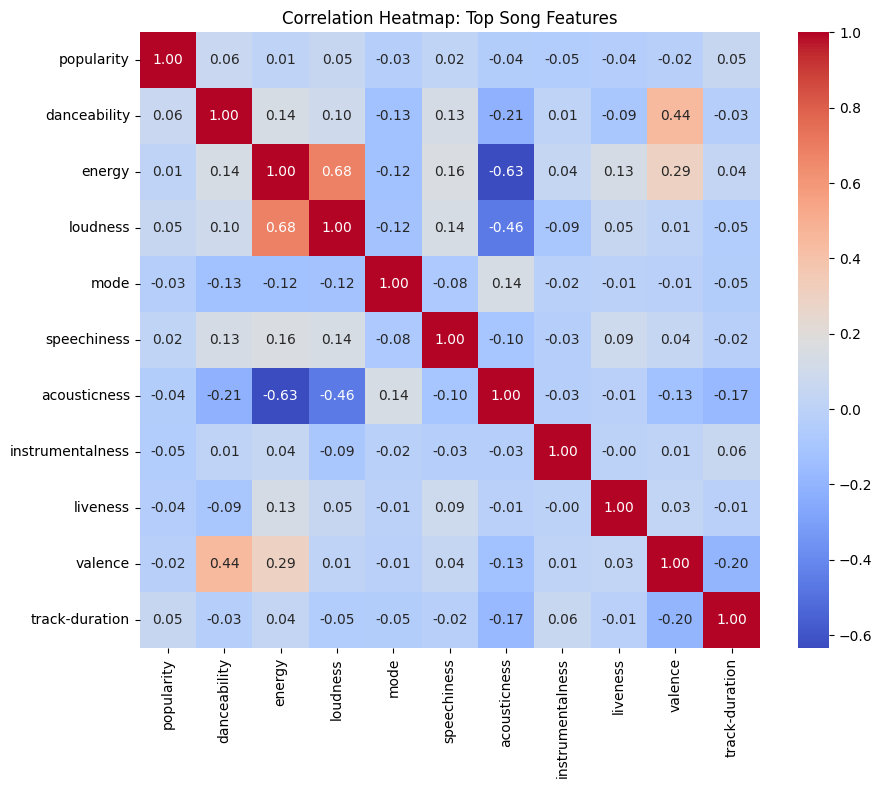

In [93]:
# Relationship between (1) popularity and (2) danceability, energy, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, and track-duration.

cols_to_corr = ['popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'track-duration']
corr_popularity = df[cols_to_corr].corr()

# Display as heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_popularity, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Top Song Features')
plt.show()


- Popularity does not seem to be correlated to any song characteristics
- Danceability and valence have around 50/50 correlation
- Energy and loudness are somehow directly corrected. Loud songs have higher energy score.
- Energy and acousticness are somehow inversely correlated. The more acoustic the song is, the less energy score it has.
- Acousticness and loudness have a 50/50 correlation. Acoustic songs tend to have a lower loudness score.

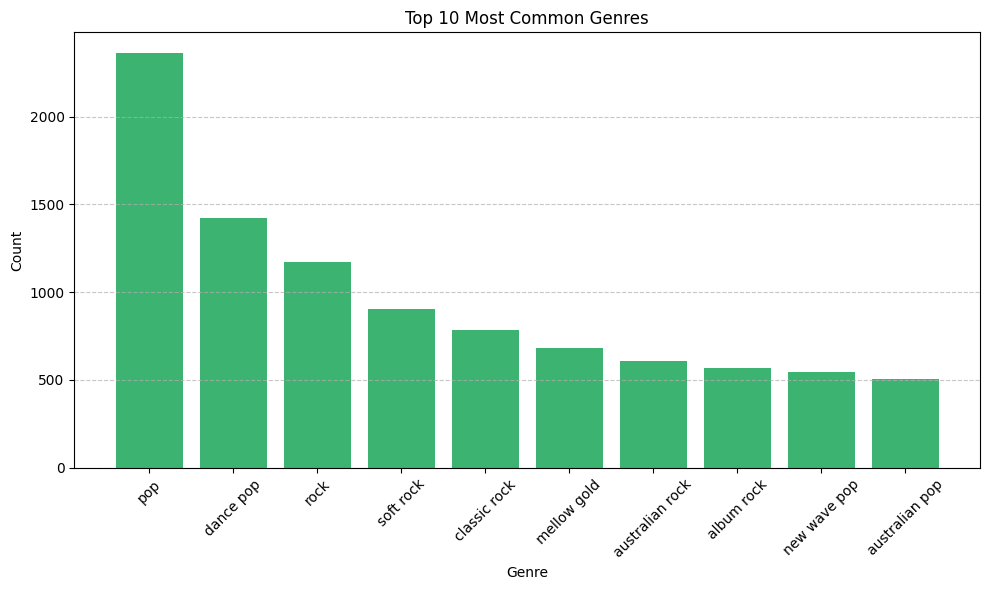

In [143]:
# Which is the most common genre?

from collections import Counter

# Drop NaNs in case there are any missing genres
genres_series = df['artist-genres'].dropna()

# Split the comma-separated strings into lists
genre_lists = genres_series.str.split(',')

# Flatten the list of lists into a single list
all_genres = [genre.strip() for sublist in genre_lists for genre in sublist]

# Count occurrences using Counter
genre_counts = Counter(all_genres)

# Get the most common genres
most_common_genres = genre_counts.most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(most_common_genres, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='mediumseagreen')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Anatomy of Top Songs - Elvis Presley and Ed Sheeran

In [138]:
# Elvis Presley and Ed Sheeran statistics
artist = ['Elvis Presley', 'The Beatles', 'Ed Sheeran', 'P!nk', 'Taylor Swift']

df_eled = df_artists_split[df_artists_split['artist'].isin(artist)]
df_eled.head(5)

,track-name,artist,album-name,album-artist-name,disc-number,track-number,track-duration,explicit,popularity,artist-genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time-signature,label,album-release-year,decade
1,Cruel Summer,Taylor Swift,Lover,Taylor Swift,1,2,178426.0,False,90.0,pop,0.552,0.702,9.0,-5.707,1.0,0.1570,0.117,0.000021,0.1050,0.564,169.994,4.0,Taylor Swift,2019,2010
32,Shape of You,Ed Sheeran,÷ (Deluxe),Ed Sheeran,1,4,233712.0,False,85.0,"pop,singer-songwriter pop,uk pop",0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.000000,0.0931,0.931,95.977,4.0,Atlantic Records UK,2017,2010
35,Perfect,Ed Sheeran,÷ (Deluxe),Ed Sheeran,1,5,263400.0,False,85.0,"pop,singer-songwriter pop,uk pop",0.599,0.448,8.0,-6.312,1.0,0.0232,0.163,0.000000,0.1060,0.168,95.050,3.0,Atlantic Records UK,2017,2010
58,Just Give Me a Reason (feat. Nate Ruess),P!nk,The Truth About Love,P!nk,1,4,242733.0,False,84.0,"dance pop,pop,modern rock",0.778,0.547,2.0,-7.273,1.0,0.0489,0.344,0.000306,0.1320,0.442,95.000,4.0,RCA Records Label,2012,2010
63,Lover,Taylor Swift,Lover,Taylor Swift,1,3,221306.0,False,84.0,pop,0.359,0.543,7.0,-7.582,1.0,0.0919,0.492,0.000016,0.1180,0.453,68.534,4.0,Taylor Swift,2019,2010


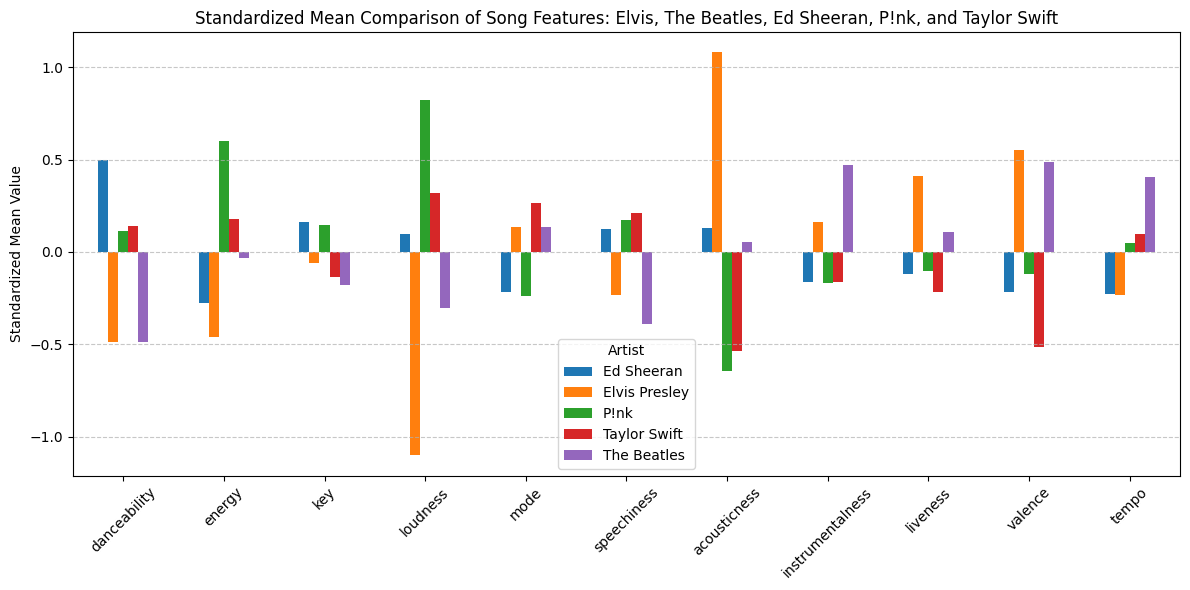

In [137]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns
numeric_cols = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Standardize the numeric features
scaler = StandardScaler()
df_scaled = df_eled.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Compute the mean of standardized values per artist
means = df_scaled.groupby('artist')[numeric_cols].mean()

# Transpose for easier plotting
means_transposed = means.T

# Plotting
means_transposed.plot(kind='bar', figsize=(12, 6))
plt.title('Standardized Mean Comparison of Song Features: Elvis, The Beatles, Ed Sheeran, P!nk, and Taylor Swift')
plt.ylabel('Standardized Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Artist')
plt.show()
